# Clustering

In [1]:
import pandas as pd
from pandas import read_csv

data = pd.read_csv('data/expression_final.csv',sep=',')
data.head(2)

,Unnamed: 0,1101,1104,29,30,1977,1973,1980,1976,1978,...,1563,796,797,799,800,798,801,1296,1677,1672
0,AT1G01010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,AT1G01030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
data = data.set_index(['Unnamed: 0'])

## Clustering sur les stress

Regroupement (clusturing) des stress à partir de la matrice d'expression différencielle des gènes issu du preprocessing

In [9]:
data = data.T

### k-means

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10).fit(data)
        
    labels = kmeans.labels_
        
    silhouette_avg = silhouette_score(data, labels)
        
    print(f"Silhouette Score {k} clusters : {silhouette_avg}")

Silhouette Score 2 clusters : 0.21099028362397904
Silhouette Score 3 clusters : 0.22800165307710765
Silhouette Score 4 clusters : 0.21491444060615192
Silhouette Score 5 clusters : 0.1521136229308125
Silhouette Score 6 clusters : 0.14899469301756482
Silhouette Score 7 clusters : 0.08117780409384423
Silhouette Score 8 clusters : 0.08296695771993731
Silhouette Score 9 clusters : 0.08665985882322653
Silhouette Score 10 clusters : 0.05773310073253474


Silhouette Score 15 clusters: -0.039490945023128964


/home/timeo/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


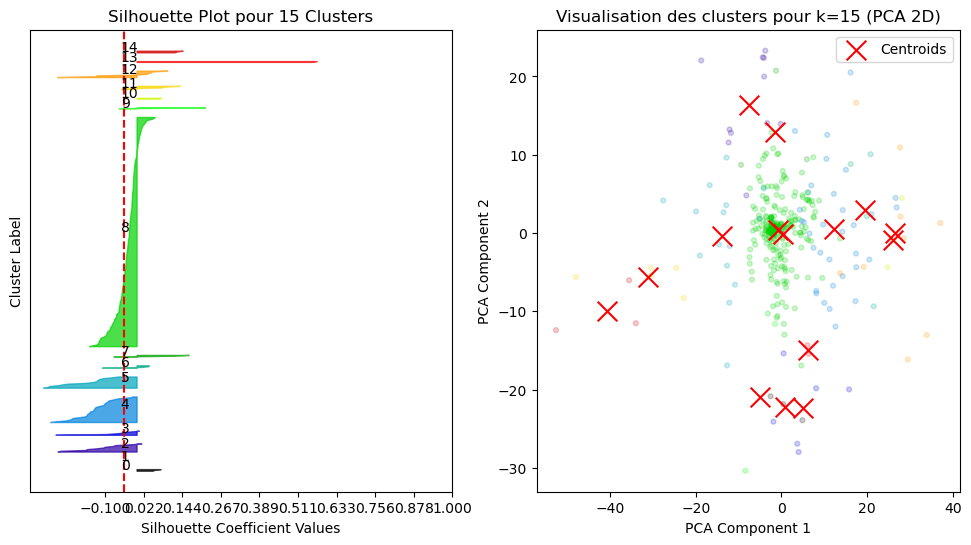

<Figure size 640x480 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA

range_clusters = range(15,16)

for k in range_clusters:
    # Appliquer KMeans
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10).fit(data)
    labels = kmeans.labels_

    # Calculer le Silhouette Score moyen
    silhouette_avg = silhouette_score(data, labels)
    print(f"Silhouette Score {k} clusters: {silhouette_avg}")

    # Calculer les Silhouettes pour chaque point
    sample_silhouette_values = silhouette_samples(data, labels)

    # Visualisation du Silhouette Plot
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12,6))
    y_lower = 10  # Baseline pour dessiner les silhouettes

    for i in range(k):
        # Regrouper les silhouettes par cluster
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Remplir chaque cluster avec un rectangle coloré
        color = plt.cm.nipy_spectral(float(i) / k)
        ax[0].fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        ax[0].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # Espace entre les clusters

    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)

    colors = plt.cm.nipy_spectral(labels.astype(float) / k)

    scatter = ax[1].scatter(data_2d[:, 0], data_2d[:, 1], c=colors, s=50, alpha=0.2, marker='.')

    centers_2d = pca.transform(kmeans.cluster_centers_)
    ax[1].scatter(centers_2d[:, 0], centers_2d[:, 1], c='red', s=200, marker='x', label='Centroids')
    
    # Ligne verticale pour le score mo
    ax[0].axvline(x=silhouette_avg, color="red", linestyle="--")
    ax[0].set_title(f"Silhouette Plot pour {k} Clusters")
    ax[0].set_xlabel("Silhouette Coefficient Values")
    ax[0].set_ylabel("Cluster Label")

    # Ajustements pour l'axe des y
    ax[0].set_yticks([])
    ax[0].set_xticks(np.linspace(-0.1, 1.0, 10))  

    ax[1].set_title(f"Visualisation des clusters pour k={k} (PCA 2D)")
    ax[1].set_xlabel("PCA Component 1")
    ax[1].set_ylabel("PCA Component 2")
    ax[1].legend(loc="best")
    
    plt.show()
    #plt.savefig(fname='Sil_plot_k5')